## Visualización de datos

Importación de librerías

In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib as plt
import seaborn as sns

Lectura de datos. Usamos el archivo creado con el dataframe final de la práctica anterior.

In [2]:
df = pd.read_csv("C:/Users/paty_/Downloads/dfco2emissions.csv",encoding='utf8', na_values=0)

Como desde nuestro dataframe tenemos la emisión global por año, usaremos funciones de estadística básica sólo para estos datos, creando un nuevo dataframe sólo para entity=World

In [3]:
dataframe=df[df['Entity']=='World']

Nuestra columna más importante es la de CO2emissions, usaremos algunas funciones para entender mejor cómo se ha comportado la emisión de gases. Primero usaremos .describe() ya que nos da la cantidad de valores no nulos, la media, la varianza, el valor mínimo, los cuartiles y el valor máximo.

In [4]:
dataframe['CO2emissions'].describe()

count    5.800000e+01
mean     2.203288e+10
std      7.660097e+09
min      9.410530e+09
25%      1.690092e+10
50%      2.191713e+10
75%      2.652360e+10
max      3.615326e+10
Name: CO2emissions, dtype: float64

De aquí, vemos que son 58 datos y que sí tienen un varianza grande. Esto lo relacionamos con que la emisión de CO2 en el mundo ha aumentado de manera desacelerada.

Ahora, con kurt buscamos la característica de forma de la distribución de frecuencias/probabilidad.

In [5]:
dataframe['CO2emissions'].kurt()

-0.7537279868601932

Ya que la curtosis es negativa podemos decir que es una distribución platicúrtica lo que indicaría que las mediciones no estan tan concentradas alrededor de la media, esto indicaría una gran variabilidad en los datos.

In [6]:
dataframe.corr()

,Unnamed: 0,Year,CO2emissions
Unnamed: 0,1.000000,1.000000,0.983244
Year,1.000000,1.000000,0.983244
CO2emissions,0.983244,0.983244,1.000000


In [7]:
dataframe.cov()

,Unnamed: 0,Year,CO2emissions
Unnamed: 0,2.851667e+02,2.851667e+02,1.271877e+11
Year,2.851667e+02,2.851667e+02,1.271877e+11
CO2emissions,1.271877e+11,1.271877e+11,5.867709e+19


Al tener la correlación números muy cercanos a 1 y al ser la covarianza números grandes podemos concluir que existe una relación lineal muy grande entre las emisiones y el año en que se hicieron.

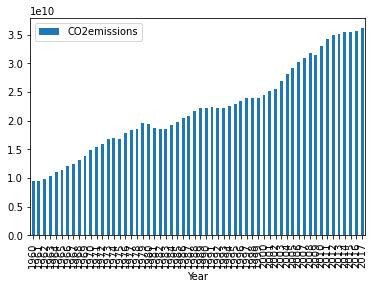

In [8]:
dataframe.plot.bar(x='Year', y='CO2emissions')

La gráfica se ve algo saturada y aunque nos ayuda a observar la tendencia y el aumento de las emisiones, consideramos que un plot line nos sería de más ayuda.

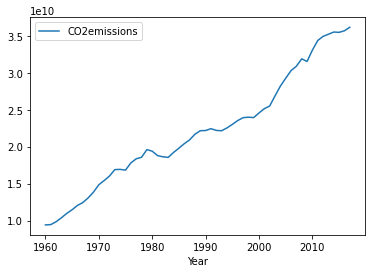

In [9]:
dataframe.plot.line(x='Year', y='CO2emissions')

Realizaremos un plot scatter para ver la tendencia de nuestros datos.

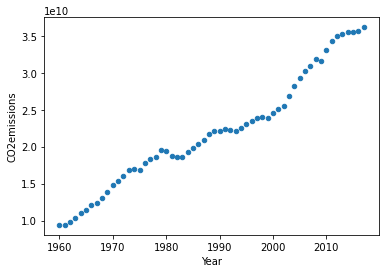

In [10]:
dataframe.plot.scatter(x='Year', y='CO2emissions')

Vemos cómo la emisión de CO2 ha aumentado al paso de los años y se podría ajustar a una recta. Realizaremos ahora un hexplot.

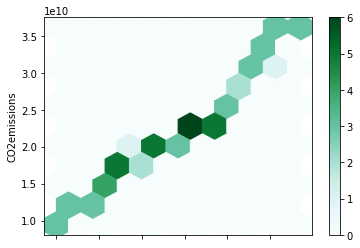

In [11]:
dataframe.plot.hexbin(x='Year', y='CO2emissions', gridsize=10)

Para este caso, consideramos que es mejor el scatterplot ya que nos interesa predecir las emisiones de CO2 y conocer la tendencia que tienen los datos (cosa que es más visible en el scatter plot), por lo que no nos es de mucha ayuda saber en qué cantidades se ha concentrado más las emisiones de CO2. Veremos que incluso un histograma nos reflejaría si bien no información sobree la tendencia, sí nos ayuda sobre igualmente saber en qué intervalos se concentró más la emisión de CO2. 

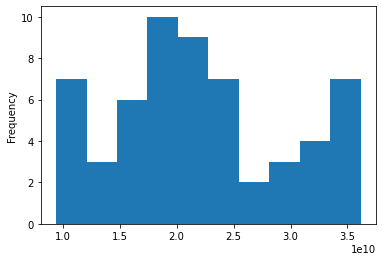

In [12]:
dataframe['CO2emissions'].plot.hist()

Usaremos ahora herramientas de visualización con la librería seaborn, comenzando con un kdeplot. 

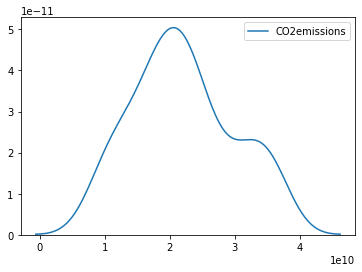

In [13]:
sns.kdeplot(dataframe.query('CO2emissions > 0').CO2emissions)

Esto de igualmanera que un histograma nos indica que hay más años con una emisión de 20 mil millones de toneladas, sin embargo esto no nos habla sobre la tendencia de los datos.

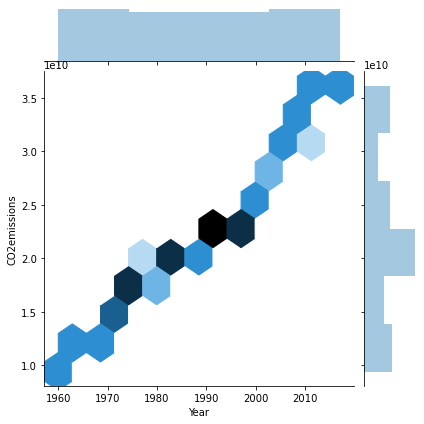

In [14]:
sns.jointplot(x='Year', y='CO2emissions', data=dataframe[dataframe['CO2emissions'] > 0], kind='hex', 
              gridsize=10)

Es similar al hex plot realizado anteriormente, sólo nos da una mejor visibilidad en los ejes.

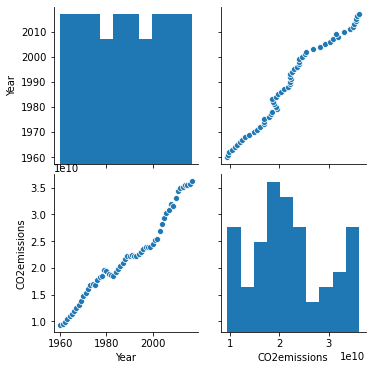

In [15]:
sns.pairplot(dataframe[['Year', 'CO2emissions']])

En esta última gráfica vemos que hay una relación lineal entre el año y la emisión de CO2.